Assumptions
* For one sample hypothesis testing, we will assume that all countries (90) dataset are the population.
* For the rest statistical analysis, 90 countries represent the sample and the population are all countries, whose parameters are unobtainable.

# Import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
import numpy.linalg as la
from scipy import stats

from google.colab import files
import io


import seaborn as sns
sns.set()

# 1) Handling data & visualization

In [2]:
# Upload dataset
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded["df_base.csv"]))

Saving df_base.csv to df_base.csv


In [3]:
# Show data
df

Country  Year  Democracy Score  Aid Received  Line Phone  Internet  \
0      Albania  1990            0.000    16300000.0        1.22       0.0   
1      Albania  1991            0.764   463000000.0        1.27       0.0   
2      Albania  1992            0.922   564000000.0        1.38       0.0   
3      Albania  1993            0.915   404000000.0        1.35       0.0   
4      Albania  1994            8.000   223000000.0        1.32       0.0   
...        ...   ...              ...           ...         ...       ...   
2605  Zimbabwe  2014           11.600   718000000.0        2.42      16.4   
2606  Zimbabwe  2015           11.600   818000000.0        2.42      22.7   
2607  Zimbabwe  2016           11.500   688000000.0        2.18      23.1   
2608  Zimbabwe  2017           11.400   754000000.0        1.86      24.4   
2609  Zimbabwe  2018            9.080   795000000.0        1.86      25.0   

       FDI  Inequality  Income           GDP  Import  Export  
0     0.00        26.9  5020.0  5.280000e+09    24.0   15.40  
1     0.00        27.0  3650.0  3.800000e+09    28.6    7.48  
2     3.07        27.0  3430.0  3.530000e+09    96.3   12.50  
3     4.89        27.0  3770.0  3.860000e+09    64.5   16.00  
4     2.82        27.0  4090.0  4.190000e+09    41.1   12.00  
...    ...         ...     ...           ...     ...     ...  
2605  2.43        43.7  2320.0  1.960000e+10    33.7   20.90  
2606  2.00        43.9  2310.0  2.000000e+10    37.6   19.20  
2607  1.67        44.1  2290.0  2.010000e+10    31.3   19.90  
2608  1.75        44.3  2330.0  2.110000e+10    30.4   19.70  
2609  3.96        47.2  2400.0  2.210000e+10    41.4   28.00  

[2610 rows x 12 columns]

Data concatenation: https://docs.google.com/document/d/1Wc8WagXTIvzPgP1Fhw-BP5AcE2Sn1dUDLPTROdZ2g10/edit

* Democracy Score: a measurement in percentage of the extent to which direct democracy is available and used, calculated from the direct democracy indicator of V-Dem and the electoral indicator from BRRD.
* Aid Received: net Official Development Assistance (ODA) received (in constant 2014 USD)
* Line phone: number of people subscribing to line phone service
* Internet: percentage of population using the Internet
* FDI: foreign direct investment, net inflows (% of GDP)
* Inequality: the gini coefficient of a country
* Income: GDP per capita (price and inflation adjusted, in PPP 2017)
* GDP: total GDP (US$, inflation-adjusted)
* Import: imports as a percentage of GDP
* Export: exports as a percentage of GDP

In [4]:
# Basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2610 entries, 0 to 2609
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          2610 non-null   object 
 1   Year             2610 non-null   int64  
 2   Democracy Score  2610 non-null   float64
 3   Aid Received     2610 non-null   float64
 4   Line Phone       2610 non-null   float64
 5   Internet         2610 non-null   float64
 6   FDI              2610 non-null   float64
 7   Inequality       2610 non-null   float64
 8   Income           2610 non-null   float64
 9   GDP              2610 non-null   float64
 10  Import           2610 non-null   float64
 11  Export           2610 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 244.8+ KB


In [5]:
df.describe()

Year  Democracy Score  Aid Received   Line Phone     Internet  \
count  2610.000000      2610.000000  2.610000e+03  2610.000000  2610.000000   
mean   2004.000000         6.924900  6.566765e+08     6.931243    11.857447   
std       8.368204        10.647223  1.002171e+09     7.706399    18.424615   
min    1990.000000         0.000000 -9.980000e+08     0.000000     0.000000   
25%    1997.000000         0.000000  1.502500e+08     0.791500     0.046800   
50%    2004.000000         2.870000  3.615000e+08     3.930000     2.400000   
75%    2011.000000        10.300000  8.117500e+08    10.700000    15.900000   
max    2018.000000        88.200000  2.570000e+10    66.500000    89.200000   

               FDI   Inequality        Income           GDP       Import  \
count  2610.000000  2610.000000   2610.000000  2.610000e+03  2610.000000   
mean      3.315177    42.896015   6856.927969  1.606566e+11    38.891976   
std       4.813621     8.577047   5569.124147  7.262442e+11    18.197137   
min     -70.000000    25.300000    479.000000  2.870000e+08     0.015600   
25%       0.750250    36.300000   2442.500000  6.072500e+09    25.625000   
50%       2.140000    42.100000   4890.000000  1.565000e+10    34.500000   
75%       4.560000    48.300000  10100.000000  7.385000e+10    49.900000   
max      55.100000    70.900000  31100.000000  1.350000e+13   115.000000   

            Export  
count  2610.000000  
mean     31.166988  
std      17.524761  
min       0.005380  
25%      18.500000  
50%      27.200000  
75%      40.800000  
max     121.000000

In [6]:
# Number of countries
countries_lst = list(df['Country'].unique())
print(f"There are {len(countries_lst)} countries in the dataset from {min(df.Year)} to {max(df.Year)}.")

There are 90 countries in the dataset from 1990 to 2018.


In [10]:
# Add additional histograms using pd.plotting
plt.figure(figsize=(20, 8), dpi = 1000)
for i, column in enumerate(df.drop('Year', axis = 1).select_dtypes(include='number')):
    plt.subplot(2, 5, i+1)  # Adjust the number of rows and columns based on your data
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    plt.title(column, fontsize=14, fontweight='bold' )  # Set the title of each subplot to the column name
    plt.hist(df[column], bins='auto', edgecolor='none')
plt.tight_layout()  # Adjust spacing between subplots
plt.show()

<ipython-input-8-e82966f9d60c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


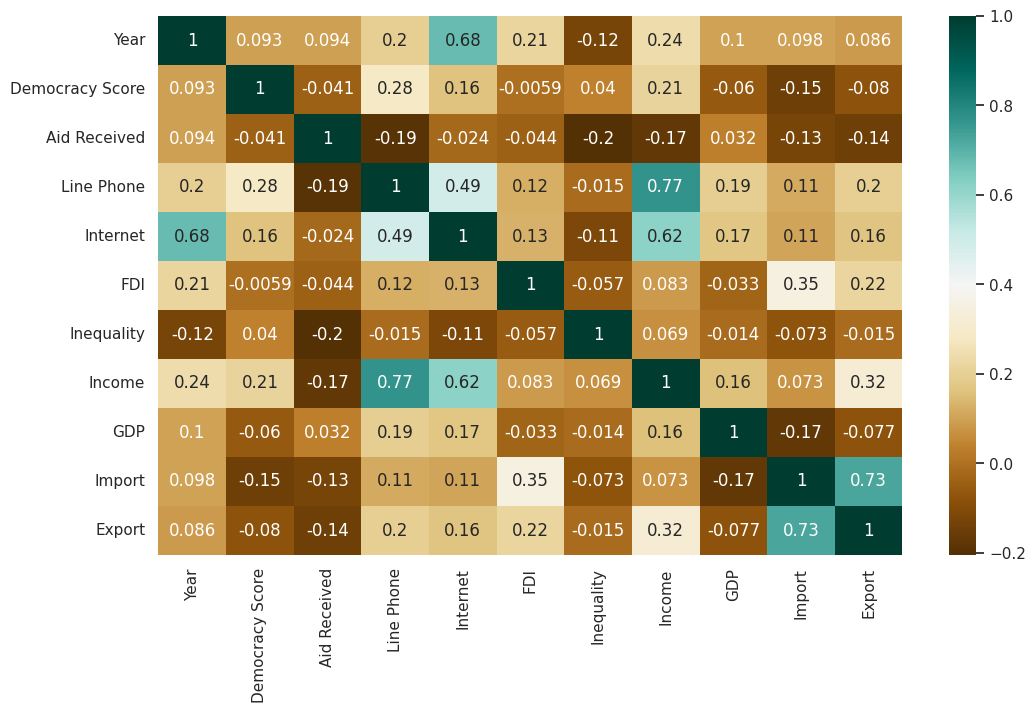

In [8]:
# Correlation map
plt.figure(figsize=(12,7))
correlation = df.corr()
sns.heatmap(correlation,cmap="BrBG",annot=True)
plt.show()

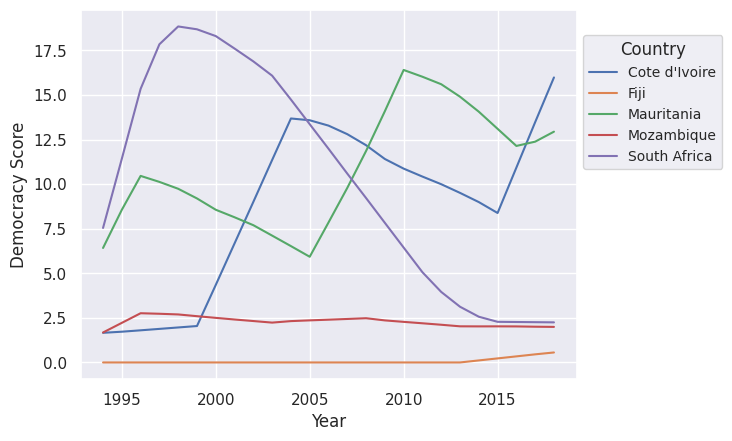

In [11]:
# Plot democracy scores over time of 5 randomly selected countries
# import random
selected_countries = ["Cote d'Ivoire", "Fiji", "Mauritania", "Mozambique", "South Africa"]

# Filter the dataset to include only the selected countries
df_selected = df[df['Country'].isin(selected_countries)]

# Pivot the DataFrame to have years as columns and countries as rows
df_pivot = df_selected.pivot(index='Country', columns='Year', values='Democracy Score')

# Plotting the line graph
ax = df_pivot.T.rolling(window = 5).mean().plot(kind='line')

# Customize the legend
ax.legend(title='Country', loc='center left', bbox_to_anchor=(1, 0.75), fontsize='small')

# Customize the graph
# plt.title('Democracy Scores Over Times')
plt.xlabel('Year')
plt.ylabel('Democracy Score')

# Display the graph
plt.show()

# 2) Parameter estimation: confidence interval with unknown σ

Use stats.t.interval to calculate 95% confidence interval

In [12]:
# Estimate 95% confidence interval of democracy scores of all countries in dataset in 1990
democracy_1990 = df['Democracy Score'][df.Year == 1990]
stats.t.interval(confidence=0.95, df=len(democracy_1990), loc=np.mean(democracy_1990), scale=stats.sem(democracy_1990))

(1.6287236992851553, 5.206942967381512)

In [13]:
# Estimate 95% confidence interval of democracy scores of all countries in dataset in 2018
democracy_2018 = df['Democracy Score'][df.Year == 2018]
stats.t.interval(confidence=0.95, df=len(democracy_2018), loc=np.mean(democracy_2018), scale=stats.sem(democracy_2018))

(5.14011458934919, 9.38721874398414)

In [14]:
import statistics
from math import sqrt

def plot_confidence_interval(x, values, z=1.96, color='#2187bb', horizontal_line_width=0.25):
    mean = statistics.mean(values)
    stdev = statistics.stdev(values)
    confidence_interval = z * stdev / sqrt(len(values))

    left = x - horizontal_line_width / 2
    top = mean - confidence_interval
    right = x + horizontal_line_width / 2
    bottom = mean + confidence_interval
    plt.plot([x, x], [top, bottom], color=color)
    plt.plot([left, right], [top, top], color=color)
    plt.plot([left, right], [bottom, bottom], color=color)
    plt.plot(x, mean, 'o', color='#f44336')

    return mean, confidence_interval

In [15]:
plt.figure(figsize=(20, 6), dpi = 1000)

plt.xticks(df.Year.unique(),df.Year.unique())
# plt.title('95% Confidence Interval (Democracy Score)', fontsize=16, fontweight='bold')

for i in df.Year.unique():
  plot_confidence_interval(i, df['Democracy Score'][df.Year == i])

plt.show()

# 3) One sample hypothesis testing

Perform a t-test comparing a sample mean to a given population mean

In [16]:
# Hypothesis testing 1
# H0: mean income of selected countries in 2018 = 22,000
# Ha: mean income of selected countries in 2018 < 22,000 -> low-income
LOW_INCOME_THRESHOLD = 22000
income_2018 = df['Income'][df.Year == 2018]
stats.ttest_1samp(income_2018, LOW_INCOME_THRESHOLD, alternative = 'less')

TtestResult(statistic=-16.355110378143962, pvalue=7.371553581977891e-29, df=89)

The small p-value (<0.05) indicates that we can reject the null hypothesis and that selected countries in the year 2018 have a significantly lower income than the specified population mean of 22000.

In [17]:
# Hypothesis testing 2
# H0: net export of selected countries in 2018 = 0 -> trade balance
# Ha: net export of selected countries in 2018
export_volume = df['Export'][df.Year == 2018] * df['GDP'][df.Year == 2018]
import_volume = df['Import'][df.Year == 2018] * df['GDP'][df.Year == 2018]
net_export = export_volume - import_volume
TRADE_BALANCE = 0
stats.ttest_1samp(net_export, 0 , alternative = 'two-sided')

TtestResult(statistic=-1.3123153380757684, pvalue=0.19278819437782174, df=89)

The high p-value (>0.05) indicates that we cannot reject the null hypothesis and that selected countries in the year 2018 have trade balance.



In [18]:
# Hypothesis testing 3
# H0: democracy score of selected countries in 2018 = mean of democracy score of selected countries in 1990
# Ha: democracy score of selected countries in 2018 > mean of democracy score of selected countries in 1990
democracy_2018 = df['Democracy Score'][df.Year == 2018]
MEAN_DEMOCRACY_1990 = statistics.mean(df['Democracy Score'][df.Year == 1990])
stats.ttest_1samp(democracy_2018, MEAN_DEMOCRACY_1990, alternative = 'greater')

TtestResult(statistic=3.5979429241466616, pvalue=0.0002632807934303241, df=89)

The low p-value (<=0.05) indicates that we can reject the null hypothesis and that selected countries in the year 2018 might have higher democracy score compared to the mean of democracy score of selected countries in 1990.

Thus, there is evidence to say that countries are becoming more democratic now compared to the past.

In [19]:
# Hypothesis testing 4
# H0: democracy score of selected countries in 2018 = variance of democracy score of selected countries in 1990
# Ha: democracy score of selected countries in 2018 < variance of democracy score of selected countries in 1990
VAR_DEMOCRACY_1990 = statistics.pvariance(df['Democracy Score'][df.Year == 1990])
stats.ttest_1samp(democracy_2018, VAR_DEMOCRACY_1990, alternative = 'less')

TtestResult(statistic=-60.73103171867646, pvalue=1.5615325498791919e-74, df=89)

The low p-value (<0.05) indicates that we can reject the null hypothesis and that democracy scores of selected countries might have lower variability than in 1990, suggesting that countries in the past might be more diverse in terms of democracy level.

# 4) Two samples hypothesis testing

We want to divide the population into 2 populations based on one of variables such as Aid Received, Line Phone, Internet, FDI, Inequality, Income, GDP, export, and Import. To ensure the 2 sample sizes are large enough (=45) to be normal (Central Limit Theorem), we will use median of the chosen variable as a dividing threshold in 2018.

In [20]:
# Create a trade variable instead of using export and import
df['Trade'] = (df['Export'] + df['Import']) * df['GDP']
df.head()

Country  Year  Democracy Score  Aid Received  Line Phone  Internet   FDI  \
0  Albania  1990            0.000    16300000.0        1.22       0.0  0.00   
1  Albania  1991            0.764   463000000.0        1.27       0.0  0.00   
2  Albania  1992            0.922   564000000.0        1.38       0.0  3.07   
3  Albania  1993            0.915   404000000.0        1.35       0.0  4.89   
4  Albania  1994            8.000   223000000.0        1.32       0.0  2.82   

   Inequality  Income           GDP  Import  Export         Trade  
0        26.9  5020.0  5.280000e+09    24.0   15.40  2.080320e+11  
1        27.0  3650.0  3.800000e+09    28.6    7.48  1.371040e+11  
2        27.0  3430.0  3.530000e+09    96.3   12.50  3.840640e+11  
3        27.0  3770.0  3.860000e+09    64.5   16.00  3.107300e+11  
4        27.0  4090.0  4.190000e+09    41.1   12.00  2.224890e+11

In [21]:
var = [1,2]
max(var)

2

In [22]:
variables = ['Aid Received', 'Line Phone', 'Internet', 'FDI',
             'Inequality', 'Income', 'GDP', 'Trade']
t_stats = []
p_values = []
result_H0 = []

for i in variables:
  median = statistics.median(df[i][df.Year == 2018])
  sample1 = df['Democracy Score'][(df.Year == 2018) & (df[i] >= median)]
  sample2 = df['Democracy Score'][(df.Year == 2018) & (df[i] < median)]
  var = [np.var(sample1), np.var(sample2)]
  if max(var) / min(var) < 4:
    t_stat, p_value = stats.ttest_ind(sample1, sample2, equal_var=True)
  else:
    t_stat, p_value = stats.ttest_ind(sample1, sample2, equal_var=False)
  t_stats.append(t_stat)
  p_values.append(p_value)
  if p_value > 0.05:
    result_H0.append('Accept')
  else:
    result_H0.append('Reject')

equal_var = “True”: The standard independent two sample t-test will be conducted by taking into consideration the equal population variances.
equal_var = “False”: The Welch’s t-test will be conducted by not taking into consideration the equal population variances.

Before conducting the two-sample T-Test we need to find if the given data groups have the same variance. If the ratio of the larger data groups to the small data group is less than 4:1 then we can consider that the given data groups have equal variance.

In [23]:
hypothesis_2samp_result = pd.DataFrame({'Variable': variables,
                              # 'T stat': t_stats,
                              'p value': p_values,
                              'H0': result_H0})
hypothesis_2samp_result

Variable   p value      H0
0  Aid Received  0.771385  Accept
1    Line Phone  0.031450  Reject
2      Internet  0.148741  Accept
3           FDI  0.219690  Accept
4    Inequality  0.421715  Accept
5        Income  0.069424  Accept
6           GDP  0.103681  Accept
7         Trade  0.077072  Accept

H0: democracy scores of 2 samples with different levels (aid received, trade...) are similar

Ha: democracy scores of 2 samples with different levels (aid received, trade...) are different

From the result table, only samples with varying line phone have a significant difference, thus line phone may a determinant that affects democracy score or countries with high level access of line phone may have different democracy score than countries with low level access of line phone.

# 5) Non-parametric hypothesis testing

**Income**

We found that > 13,205 USD in 2022 value is considered high income and <= 13,205 USD is considered low income. Adjusted inflation (3.84%), the dividing threshold is ~12,697 in 2018.
https://datahelpdesk.worldbank.org/knowledgebase/articles/906519#High_income

In [24]:
INCOME_THRES = 12697
high_income = df['Democracy Score'][(df.Year == 2018) & (df['Income'] >= INCOME_THRES)]
low_income = df['Democracy Score'][(df.Year == 2018) & (df['Income'] < INCOME_THRES)]

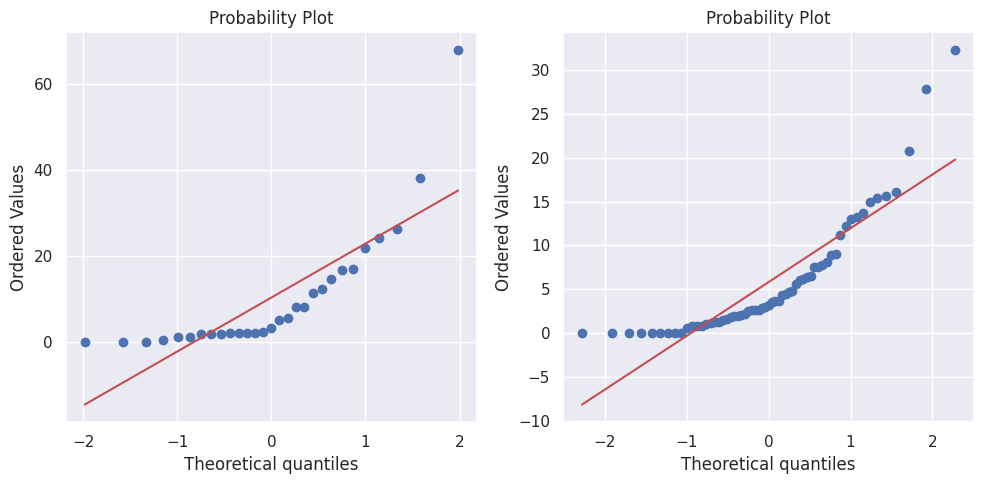

In [25]:
from scipy.stats import probplot

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Probability plot for high-income countries
axs[0].set_title("High-income countries")
probplot(high_income, dist='norm', plot=axs[0])

# Probability plot for low-income countries
axs[1].set_title("Low-income countries")
probplot(low_income, dist='norm', plot=axs[1])

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

In [26]:
(len(high_income), len(low_income))

(29, 61)

In [27]:
# As the two samples are not normal,
# we use non-parametric test - Man-Whitney U test
stats.mannwhitneyu(sample1, sample2)

MannwhitneyuResult(statistic=1089.5, pvalue=0.5365256836693642)

The high p-value (>0.05) suggests that we cannot reject the null hypothesis and that there is lack of evidence to suggest the democracy scores of high income countries are different from those of low-income countries. This result is similar to the results of two samples hypothesis test when the two samples are normal (given different INCOME_THRES).






# 6) Regression

## Multiple regressions

In [28]:
from sklearn.preprocessing import StandardScaler     # Import function to perform Standardization
list_regressor = []
for i in df.Year.unique():
  scaler_x = StandardScaler()
  y = df['Democracy Score'][df.Year == i]
  x = df[df.Year == i][['Aid Received','Line Phone', 'Internet', 'FDI','Inequality','GDP','Import','Export']]
  x_scaled = sm.add_constant(scaler_x.fit_transform(x))
  list_regressor.append(sm.OLS(y, x).fit())

In [29]:
coef_data = pd.DataFrame()
for i in range(len(list_regressor)):
  coef_data = pd.concat([coef_data, list_regressor[i].params], axis = 1)
coef_data.columns = df.Year.unique()
coef_data

1990          1991          1992          1993  \
Aid Received  1.410826e-09  1.757565e-09  1.825611e-09  3.040445e-09   
Line Phone    8.832082e-01  1.007382e+00  1.000611e+00  9.610389e-01   
Internet      1.559891e-15 -4.383838e-02 -3.020720e+02 -1.025595e+02   
FDI          -1.349470e-01 -6.746935e-02 -2.575664e-01  3.417605e-02   
Inequality    9.531235e-02  8.560717e-02  1.834311e-01  1.647457e-01   
GDP          -8.201115e-12 -9.107473e-12 -9.622127e-12 -1.255070e-11   
Import       -1.466380e-01 -1.406695e-01 -1.667345e-01 -1.893147e-01   
Export        4.095243e-02  3.917749e-02 -2.265652e-02  1.821893e-02   

                      1994          1995          1996          1997  \
Aid Received  2.498536e-09  2.980322e-09  4.198245e-09  3.609163e-09   
Line Phone    1.006956e+00  8.739361e-01  3.150894e-01  4.470189e-01   
Internet     -8.478850e+00  1.091759e+01  2.023068e+01  6.063511e+00   
FDI          -1.064472e-01 -1.209563e-02 -3.720977e-01 -2.706150e-01   
Inequality    1.683389e-01  1.526495e-01  1.419462e-01  1.491681e-01   
GDP          -1.289048e-11 -1.308343e-11 -1.191355e-11 -1.037552e-11   
Import       -1.689652e-01 -1.948709e-01 -1.372067e-01 -1.494608e-01   
Export        1.271938e-02  6.490620e-02  3.521619e-02  3.947079e-02   

                      1998          1999  ...          2009          2010  \
Aid Received  1.961109e-09  2.070790e-09  ... -8.189438e-11 -5.178645e-10   
Line Phone    1.904499e-01  3.484797e-01  ...  2.570539e-01  2.869511e-01   
Internet      4.472183e+00  1.679681e+00  ...  2.037929e-01  1.777659e-01   
FDI          -2.972396e-01 -7.054621e-01  ... -3.162275e-03  1.701185e-01   
Inequality    1.847058e-01  2.014185e-01  ...  2.243545e-01  2.512075e-01   
GDP          -7.593964e-12 -7.961536e-12  ... -3.220173e-12 -3.013592e-12   
Import        8.671861e-03 -3.911575e-02  ... -1.135366e-01 -1.819543e-01   
Export       -1.860669e-01 -1.151492e-01  ... -4.389424e-02 -8.571618e-03   

                      2011          2012          2013          2014  \
Aid Received  6.912208e-10  1.243627e-09  1.470731e-09  7.041326e-10   
Line Phone    3.090899e-01  3.969416e-01  4.693476e-01  4.312731e-01   
Internet      1.612825e-01  1.052153e-01  6.657706e-02  4.655211e-02   
FDI           1.259674e-01  2.525405e-01  9.883489e-02  1.353141e-01   
Inequality    1.766745e-01  1.489299e-01  1.423043e-01  1.571683e-01   
GDP          -2.522660e-12 -2.256541e-12 -1.989602e-12 -1.691031e-12   
Import       -1.317851e-01 -1.118686e-01 -1.030691e-01 -6.746529e-02   
Export       -1.450159e-03 -1.762418e-02 -6.823673e-03 -6.012936e-02   

                      2015          2016          2017          2018  
Aid Received  4.913382e-10  1.622256e-10  1.454086e-10  6.819278e-10  
Line Phone    4.106812e-01  2.478631e-01  3.071783e-01  3.263473e-01  
Internet      3.601129e-02  6.721001e-02  4.842160e-02  3.627227e-02  
FDI           2.433591e-01 -8.224444e-02  5.511531e-02  1.152535e-01  
Inequality    1.690993e-01  1.795313e-01  1.654213e-01  1.444877e-01  
GDP          -1.490144e-12 -1.323130e-12 -1.175547e-12 -9.745140e-13  
Import       -9.513995e-02 -8.058961e-02 -1.102985e-01 -7.403079e-02  
Export       -5.168970e-02 -2.854619e-02  8.404548e-03 -2.295628e-02  

[8 rows x 29 columns]

In [30]:
pvalue_data = pd.DataFrame()
for i in range(len(list_regressor)):
  pvalue_data = pd.concat([pvalue_data, list_regressor[i].pvalues], axis = 1)
pvalue_data.columns = df.Year.unique()
pvalue_data < 0.05/29

1990   1991   1992   1993   1994   1995   1996   1997   1998  \
Aid Received  False  False  False  False  False  False  False  False  False   
Line Phone     True   True   True   True   True   True  False  False  False   
Internet      False  False  False  False  False  False   True  False   True   
FDI           False  False  False  False  False  False  False  False  False   
Inequality    False  False   True   True  False  False  False  False   True   
GDP           False  False  False  False  False  False  False  False  False   
Import        False  False  False  False  False  False  False  False  False   
Export        False  False  False  False  False  False  False  False  False   

               1999  ...   2009   2010   2011   2012   2013   2014   2015  \
Aid Received  False  ...  False  False  False  False  False  False  False   
Line Phone    False  ...  False  False  False  False  False  False  False   
Internet      False  ...  False  False  False  False  False  False  False   
FDI           False  ...  False  False  False  False  False  False  False   
Inequality     True  ...  False  False  False  False  False  False  False   
GDP           False  ...  False  False  False  False  False  False  False   
Import        False  ...  False  False  False  False  False  False  False   
Export        False  ...  False  False  False  False  False  False  False   

               2016   2017   2018  
Aid Received  False  False  False  
Line Phone    False  False  False  
Internet      False  False  False  
FDI           False  False  False  
Inequality    False  False  False  
GDP           False  False  False  
Import        False  False  False  
Export        False  False  False  

[8 rows x 29 columns]

In [31]:
rejection = (pvalue_data < 0.05/30)
all_sig = pvalue_data[rejection.all(axis=1)].index
rel_sig = pvalue_data[rejection.sum(axis=1) > 0].index

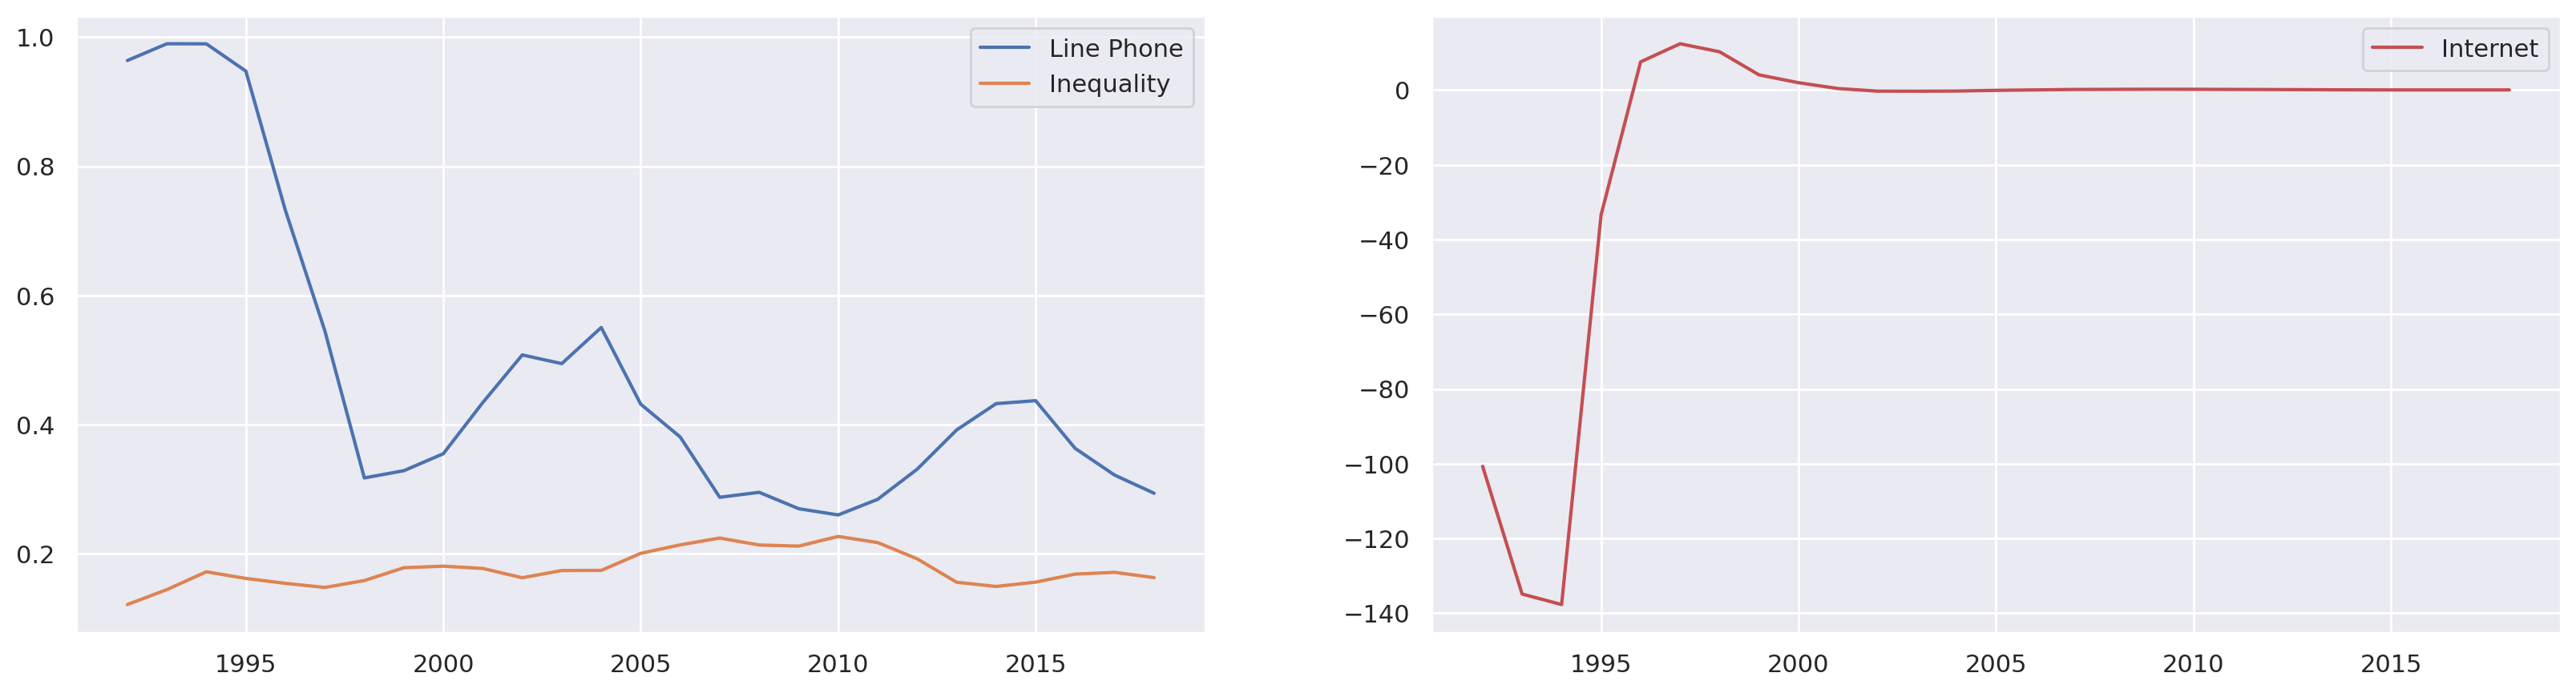

In [32]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (20,5), dpi = 200)

for i in rel_sig.drop('Internet'):
  ax1.plot(coef_data.columns, coef_data.loc[i, :].rolling(window = 3).mean())

ax2.plot(coef_data.columns, coef_data.loc['Internet', :].rolling(window = 3).mean(), label = 'Internet', color = 'r')

ax2.legend()
ax1.legend(rel_sig.drop('Internet'))

In [33]:
coef_data.columns

Int64Index([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
            2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
            2012, 2013, 2014, 2015, 2016, 2017, 2018],
           dtype='int64')

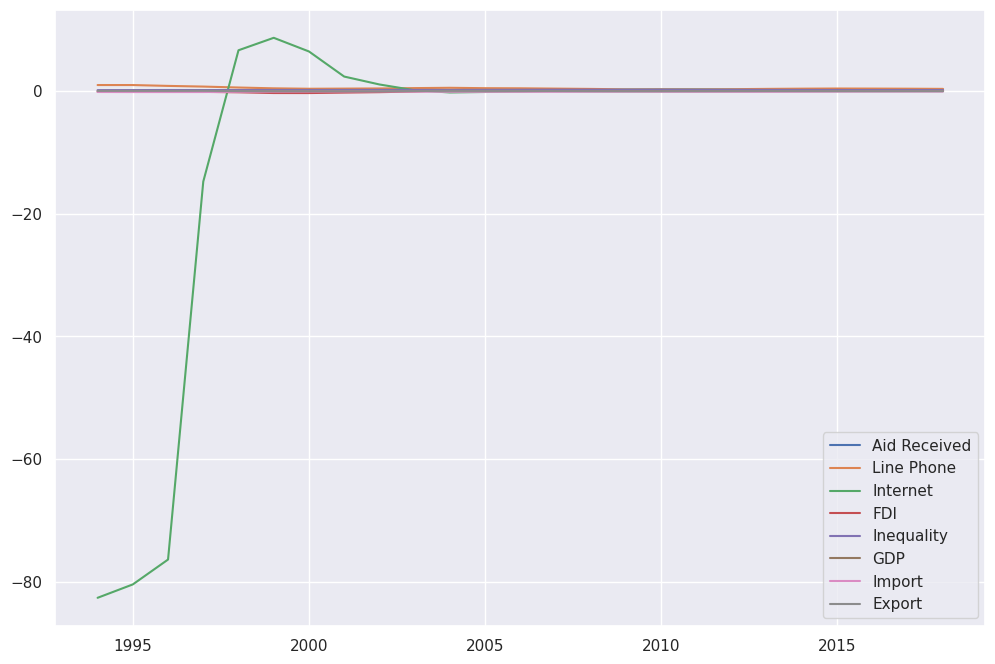

In [34]:
fig, ax = plt.subplots(figsize = (12,8))
for i in coef_data.index:
  ax.plot(coef_data.columns, coef_data.loc[i, :].rolling(window = 5).mean())

plt.legend(coef_data.index)